Identify trends in genre over time

Text(0, 0.5, 'Average MAL Score')

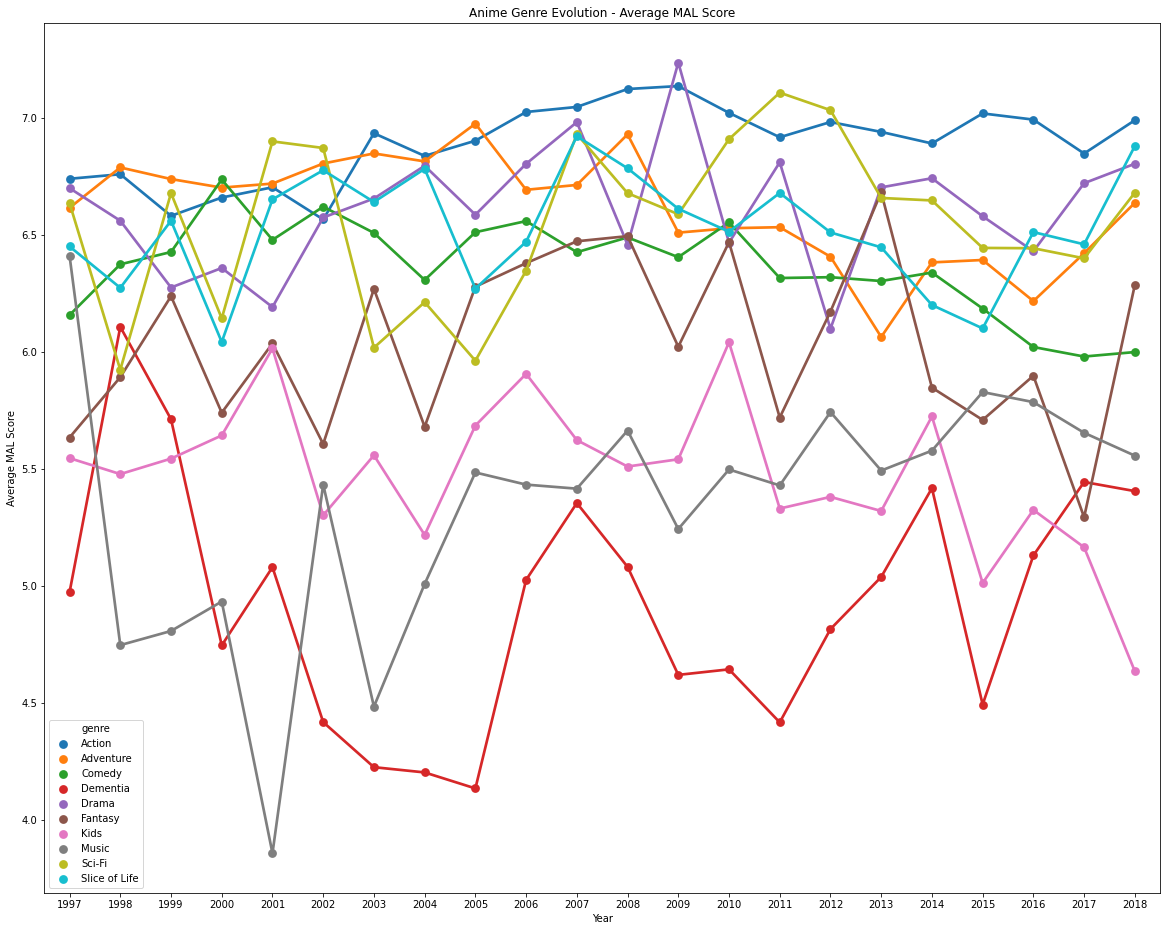

In [4]:
# import libraries
from datetime import datetime
from datetime import date
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

# local directory
anime_data = 'anime.csv'
time_data  = 'start_dates.csv'

# read & import data into pandas data frames
anime_df = pd.read_csv(anime_data)
# time_df  = pd.read_csv(time_data)

# drop data:
anime_df.drop(['status', 'scored_by', 'rank', 'popularity'],
              axis=1, inplace=True)

# convert data types to save memory
# time_df.anime_id = time_df.anime_id.astype('int32')
# time_df.my_score = time_df.my_score.astype('int16')
# time_df.year_watched = time_df.year_watched.astype('int16')
anime_df.anime_id = anime_df.anime_id.astype('int32')

# make a list of all possible genres
anime_df['genre'] = anime_df.genre.str.split(',')

my_genres = []
for column in anime_df[['genre']]:
    column_obj = anime_df[column]
    for genre_list in column_obj.values:
        for genre in genre_list:
            my_genres.append(genre.strip())
genre_set = set(my_genres)
my_genres = list(genre_set)        # there is a total of 40 genres

# set the first genre listed as the 'main genre'
anime_df.loc[:, 'single_genre'] = anime_df.genre.map(lambda x: x[0])
anime_df.drop('genre', axis=1, inplace=True)
anime_df.rename(columns={'single_genre': 'genre'}, inplace=True)

# set the year of each anime to the year that it was premiered
anime_df['aired_string'] = anime_df.aired_string.str.split('to')
anime_df.loc[:, 'aired_string'] = anime_df.aired_string.map(lambda x: x[0].strip())
anime_df['aired_string'] = pd.to_datetime(anime_df['aired_string'], errors='coerce')
anime_df['aired_string'] = anime_df['aired_string'].dt.year
anime_df.rename(columns={'aired_string': 'year'}, inplace=True)

# obtain top 10 genres
anime_df.members = anime_df.members.astype('int32')
anime_grouped_df = anime_df.groupby('genre')
top_df = anime_grouped_df['anime_id'].count().reset_index()
top_df.sort_values('anime_id', ascending=False, inplace=True)
top_genres_df = top_df.head(n=10)

# filter out genres that are not in the top 10
top_genres = []
for genre in top_genres_df['genre']:
    top_genres.append(genre)
anime_df['target'] = anime_df['genre'].apply(lambda genre: True if genre in top_genres else False)
target_anime_df = anime_df[anime_df['target'] == True]

# determine the best range of years to analyze
year_genre_df = target_anime_df.groupby(['year', 'genre'])
year_df = target_anime_df.groupby('year')
x = year_df['anime_id'].count()
# print(x.to_string())        # triple digits appear at 1986 so this will be the starting point

year_filter_df = target_anime_df[(target_anime_df['year'] >= 1997)]
year_genre_df = year_filter_df.groupby(['year', 'genre'])

# visualzize the data
fig, ax = plt.subplots()
fig.set_size_inches(20, 16)
sns.pointplot(x='year', y='score', data=year_genre_df['score'].mean().reset_index(), hue='genre', ax=ax)

plt.title('Anime Genre Evolution - Average MAL Score')
plt.xlabel('Year')
plt.ylabel('Average MAL Score')
















# time_df.info()
# anime_df.info()
#time_df.head(20)
# anime_df.head(20)
# anime_grouped_df.head(20)
# top_df.head(20)
# top_genres_df.head(20)
# target_anime_df.head(20)
